### HELP International - Clustering based on Socio-Economic factors

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# Reading the dataset
dataset_df = pd.read_csv('Country-data.csv')
dataset_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


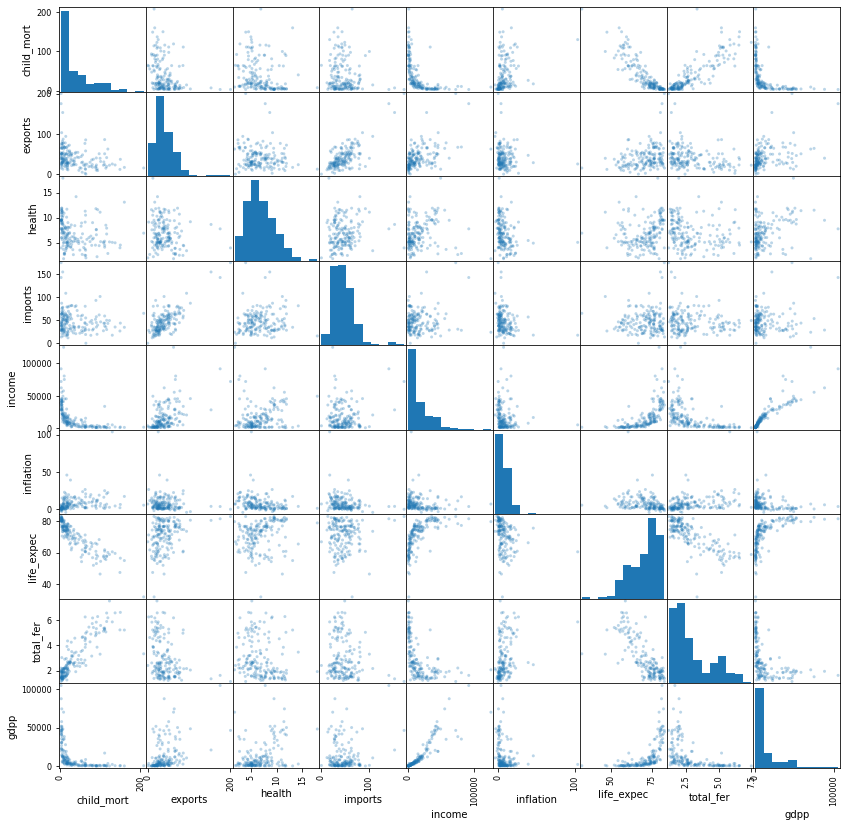

In [24]:
pd.plotting.scatter_matrix(dataset_df, alpha = 0.3, figsize = (14,14))
plt.show()

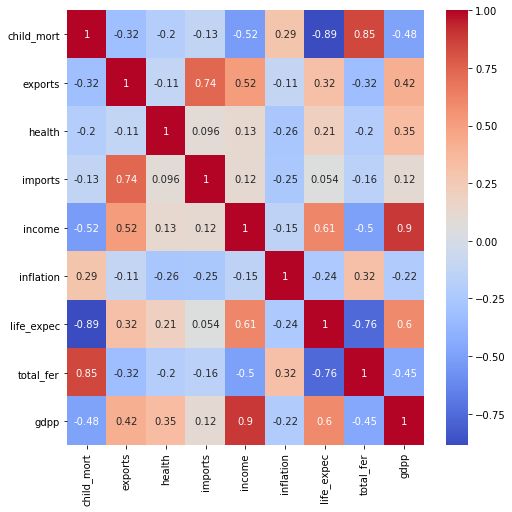

In [25]:
import seaborn
plt.figure(figsize = (8,8))
seaborn.heatmap(dataset_df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

 High Correlation between pairs 
- child_mort and total_fer
- child_mort and life_expec
- exports and imports
- income and gdpp
- life_exepc and total_fer


__Outlier Detection and removal :__
- Datapoints outside 1.5 times interquartile range will be considered as an outlier

In [26]:
# Outliers in each feature
outliers = []
i = 0
for feature in dataset_df.keys()[1:]:
    Q1 = np.percentile(dataset_df[feature],25)
    Q3 = np.percentile(dataset_df[feature],75)
    step = 1.5 * (Q3 - Q1)
    lista = dataset_df[~((dataset_df[feature] >= Q1 - step) & (dataset_df[feature] <= Q3 + step))].index.tolist()
    outliers.append(lista)

# Identifying more than one outlier
seen = {}
dupes = []

for lista in outliers:
    for index in lista:
        if index not in seen:
            seen[index] = 1
        else:
            if seen[index] == 1:
                dupes.append(index)
                seen[index] = seen[index] + 1
dupes = sorted(dupes)
print("Data points which are Outliers are \n",dupes)

dataset_df = dataset_df.drop(dupes, axis = 0).reset_index(drop = True)

Data points which are Outliers are 
 [23, 31, 66, 73, 82, 91, 98, 114, 123, 131, 133, 145, 157, 159]


In [27]:
x = dataset_df.to_numpy()
X = x[:,1:].astype("float64")      # Removed first Column: Country Name

N = len(X)
p = len(X[0])

In [28]:
# Calculating mean of data
mean = np.mean(X, axis = 0, keepdims = True).reshape(p,1)
# Now making data ZERO-MEAN (i.e Standardized data) as required for Principle Component Analysis
Xnew = X - mean.T

In [29]:
# Covariance matrix
Cxx = (1/N)*(np.matmul(Xnew.T,Xnew))

D,E = np.linalg.eig(Cxx)
print("Y=PX, where Y is representation of data X (in reduced dimension). By eigen value decomposition",end="")
print(", we can find the transformation matrix P. P=E.T (Transpose) E=Eigen Vector Matrix.")
#print("Eigen Vector matrix(E) of Cxx is")
#print(E)
#print("The Eigen Values of matrix Cxx is")
#print(D)

P = E
Y = np.dot(Xnew, P)
print(Y)
reduced_data = Y[:,:5]
reduced_data_df = pd.DataFrame(np.concatenate((x[:,0].reshape(153,1),reduced_data), axis = 1))
print("\n\nFrom above Transformed data Y we can see that for columns 1 to 5, values are large and should not be neglected.")
print("However rest all columns have very small values and can be approximated to 0")
print("In this way, we have represented the data having ",p,"features to data having 5 features")

Y=PX, where Y is representation of data X (in reduced dimension). By eigen value decomposition, we can find the transformation matrix P. P=E.T (Transpose) E=Eigen Vector Matrix.
[[ 1.52226459e+04 -2.29991546e+03 -2.85312673e+01 ... -4.27260683e+00
  -8.00121912e-01  3.67795863e-01]
 [ 6.94926852e+03  1.34520025e+03  2.79035698e+01 ...  3.47003787e+00
   5.33218826e-01  3.15178461e-01]
 [ 4.64672471e+03  3.25725171e+03  5.69987794e+00 ...  4.33731090e+00
  -3.59112006e-01  6.20275369e-01]
 ...
 [ 1.26994432e+04 -7.18039555e+02  4.09185800e+01 ...  3.45077784e+00
   4.93230155e-01 -9.41773139e-01]
 [ 1.27063396e+04 -7.25508970e+02 -4.06272966e+00 ...  8.63870837e-01
  -9.06133522e-01  3.51633777e-01]
 [ 1.34183465e+04 -1.70311016e+03 -2.76439831e+01 ... -1.03029461e+01
  -5.77602119e-01 -5.41892662e-01]]


From above Transformed data Y we can see that for columns 1 to 5, values are large and should not be neglected.
However rest all columns have very small values and can be approximated 

In [30]:
reduced_data_df

,0,1,2,3,4,5
0,Afghanistan,15222.6,-2299.92,-28.5313,-6.69212,-14.6222
1,Albania,6949.27,1345.2,27.9036,-9.32572,-6.95618
2,Algeria,4646.72,3257.25,5.69988,-15.8311,9.31457
3,Angola,10116,-1209.81,-63.7604,29.1029,20.2117
4,Antigua and Barbuda,-5239.81,2479.87,19.4399,8.6648,-7.46283
...,...,...,...,...,...,...
148,Vanuatu,12543.3,-2977.05,34.1363,12.7612,8.56425
149,Venezuela,-4408.02,-305.5,6.82517,-32.1665,32.6972
150,Vietnam,12699.4,-718.04,40.9186,44.6706,15.2572
151,Yemen,12706.3,-725.509,-4.06273,-10.698,12.7419


In [36]:
# Number of Clusters
N,p = reduced_data.shape
k = 3

#centroids = reduced_data[np.random.randint(N,size = k)]
centroids = np.random.randn(k,p)
distance = np.zeros((N,k))
print("Initial Cluster centers are \n",centroids)


Initial Cluster centers are 
 [[-0.62767019 -0.76043112 -0.76215662 -1.67616186 -0.94100379]
 [-0.60384859  0.45397502  0.96998598 -0.74813144 -1.07620943]
 [ 0.64922225 -0.19380341  0.47808276 -0.27999943  0.4623869 ]]


In [37]:
# Calculating Distance of each datapoint from each cluster centroids
num_iter = 0     # Checking Iterations to converge
RSS_list = []    # Storing Residual Sum of Squares for each Iteration
RSS_list.append(np.float("inf"))    # Initial RSS HIGHEST POSSIBLE VALUE
error = RSS_list[0]
while error > 0.0001:
    for i in range(k):
        distance_temp = np.sqrt(np.sum(np.square(reduced_data - centroids[i,:]),axis=1,keepdims=True))  # Distance from ith Centroid
        distance[:,i] = distance_temp[:,0]

    # determining to which cluster a datapoint belongs
    label = (np.argmin(distance,axis = 1))
    
    # Update cluster centers 
    for i in range(k):
        centroids[i] = np.mean(reduced_data[label == i], axis=0)
    
    # Clustered Data
    clustered_data = {}
    for i in range(k):
        clustered_data["cluster_"+str(i)] = reduced_data[label == i]
        clustered_data["cluster_distance_"+str(i)] = np.min(distance,axis = 1,keepdims=True)[label == i]
    
    RSS = 0
    for j in range(k):
        RSS = RSS + np.sum(np.power((clustered_data["cluster_"+str(j)] - centroids[j]),2))
    RSS = RSS/N
    RSS_list.append(RSS)
    error = np.sum(np.power(RSS_list[-1] - RSS_list[-2] , 2))
    num_iter = num_iter + 1

In [38]:
result_df_KMEANS = reduced_data_df
result_df_KMEANS["cluster_labels"] = label

print("Final Cluster Centers are \n",centroids)
print("Number of iterations to converge ",num_iter)
print("Residual Sum of Squares",RSS_list)

Final Cluster Centers are 
 [[-3.80275338e+04 -1.39885607e+03 -9.21073743e+00 -3.15348635e+00
  -2.26484358e+00]
 [-5.99671707e+03  3.08157085e+03  8.16861766e+00  5.55964743e-01
   1.39126412e+00]
 [ 1.12604710e+04 -8.85566894e+02 -1.05960245e+00  5.19212810e-01
  -1.75554653e-02]]
Number of iterations to converge  4
Residual Sum of Squares [inf, 67529913.25087775, 45018915.71818536, 44124937.58813331, 44124937.58813331]


In [39]:
cluster_0 = result_df_KMEANS.loc[result_df_KMEANS['cluster_labels'] == 0]
cluster_1 = result_df_KMEANS.loc[result_df_KMEANS['cluster_labels'] == 1]
cluster_2 = result_df_KMEANS.loc[result_df_KMEANS['cluster_labels'] == 2]

print("Cluster_0 : \n",cluster_0[0])
print("Cluster_1 : \n",cluster_1[0])
print("Cluster_2 : \n",cluster_2[0])

Cluster_0 : 
 7           Australia
8             Austria
11            Bahrain
15            Belgium
28             Canada
40             Cyprus
42            Denmark
51            Finland
52             France
56            Germany
58             Greece
65            Iceland
70             Israel
71              Italy
73              Japan
103       Netherlands
104       New Zealand
107              Oman
119      Saudi Arabia
128             Spain
133            Sweden
145    United Kingdom
Name: 0, dtype: object
Cluster_1 : 
 4      Antigua and Barbuda
5                Argentina
9               Azerbaijan
10                 Bahamas
13                Barbados
14                 Belarus
22                  Brazil
23                Bulgaria
31                   Chile
37              Costa Rica
39                 Croatia
41          Czech Republic
47       Equatorial Guinea
49                 Estonia
53                   Gabon
64                 Hungary
68                    Iran
75    

In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, n_init = 10, init = 'random', tol = 1e-04, max_iter = 300)
kmeans.fit(reduced_data)
y_pred = kmeans.predict(reduced_data)

result_df_KMEANS_SKLEARN = reduced_data_df
result_df_KMEANS_SKLEARN["cluster_labels"] = y_pred

cluster_sk_0 = result_df_KMEANS_SKLEARN.loc[result_df_KMEANS_SKLEARN['cluster_labels'] == 0]
cluster_sk_1 = result_df_KMEANS_SKLEARN.loc[result_df_KMEANS_SKLEARN['cluster_labels'] == 1]
cluster_sk_2 = result_df_KMEANS_SKLEARN.loc[result_df_KMEANS_SKLEARN['cluster_labels'] == 2]

print("Cluster_0 : \n",cluster_sk_0[0])
print("Cluster_1 : \n",cluster_sk_1[0])
print("Cluster_2 : \n",cluster_sk_2[0])

Cluster_0 : 
 0      Afghanistan
1          Albania
2          Algeria
3           Angola
6          Armenia
          ...     
147     Uzbekistan
148        Vanuatu
150        Vietnam
151          Yemen
152         Zambia
Name: 0, Length: 94, dtype: object
Cluster_1 : 
 4      Antigua and Barbuda
5                Argentina
9               Azerbaijan
10                 Bahamas
13                Barbados
14                 Belarus
22                  Brazil
23                Bulgaria
31                   Chile
37              Costa Rica
39                 Croatia
41          Czech Republic
47       Equatorial Guinea
49                 Estonia
53                   Gabon
64                 Hungary
68                    Iran
75              Kazakhstan
80                  Latvia
81                 Lebanon
84                   Libya
85               Lithuania
89                Malaysia
93               Mauritius
97              Montenegro
109                 Panama
113                 Poland

## GMM

In [47]:
from scipy.stats import multivariate_normal

In [43]:
# Initializing parameters
params = {}
for i in range(k):
    params["m"+str(i+1)] = reduced_data[np.random.choice(range(N))]
    params["cov"+str(i+1)] = np.cov(np.transpose(reduced_data))
    params["pi_"+str(i+1)] = np.random.uniform(low = 0, high = 1)


In [44]:
print("Initial parameters")
params

Initial parameters


{'m1': array([-4408.01894709,  -305.49985079,     6.82516912,   -32.16646408,
           32.69719299]),
 'cov1': array([[ 3.29787546e+08, -2.18609102e-08,  1.84897522e-08,
          4.14172982e-08,  2.84836565e-08],
        [-2.18609102e-08,  1.41771885e+07, -2.16695267e-09,
         -2.45671250e-09, -2.88968601e-09],
        [ 1.84897522e-08, -2.16695267e-09,  9.07386176e+02,
         -1.13780228e-10, -1.30159763e-10],
        [ 4.14172982e-08, -2.45671250e-09, -1.13780228e-10,
          4.86715848e+02, -1.70009994e-09],
        [ 2.84836565e-08, -2.88968601e-09, -1.30159763e-10,
         -1.70009994e-09,  1.19493484e+02]]),
 'pi_1': 0.4624053825346065,
 'm2': array([-3642.26564567,  5351.20666258,    -5.88852508,   -15.24204503,
            9.99965313]),
 'cov2': array([[ 3.29787546e+08, -2.18609102e-08,  1.84897522e-08,
          4.14172982e-08,  2.84836565e-08],
        [-2.18609102e-08,  1.41771885e+07, -2.16695267e-09,
         -2.45671250e-09, -2.88968601e-09],
        [ 1.84897

In [45]:
def Estep(params=params):
    pdf = {}
    for i in range(k):
        pdf["pdf"+str(i+1)] = multivariate_normal.pdf(reduced_data, mean = params["m"+str(i+1)], cov = params["cov"+str(i+1)])
        
        pdf["w"+str(i+1)] = params["pi_"+str(i+1)] * pdf["pdf"+str(i+1)]
    
    
    r_den = np.zeros_like(pdf["w1"])
    for i in range(k):
        r_den = r_den + pdf["w"+str(i+1)]
    r_complete = {}
    for i in range(k):
        r_complete["r_"+str(i+1)] = pdf["w"+str(i+1)]/r_den

    return(r_complete)


def Mstep(r_complete):
    mean_initialization = {}
    for i in range(k):
        mean_initialization["num_mu"+str(i+1)] = 0
        mean_initialization["den_mu"+str(i+1)] = 0
    # Update the means
    for j in range(k):
        for i in range(0,N):
            mean_initialization["num_mu"+str(j+1)] = mean_initialization["num_mu"+str(j+1)] + (r_complete["r_"+str(j+1)][i])*reduced_data[i]
            mean_initialization["den_mu"+str(j+1)] = mean_initialization["den_mu"+str(j+1)] + (r_complete["r_"+str(j+1)][i])
    
    params_new = {}
    for i in range(k):
        params_new["m"+str(i+1)] = mean_initialization["num_mu"+str(i+1)]/mean_initialization["den_mu"+str(i+1)]
    
    
    s_initialization = {}
    for i in range(k):
        s_initialization["num_s"+str(i+1)] = 0
        s_initialization["den_s"+str(i+1)] = 0
    # Update the s
    for j in range(k):
        for i in range(0,N):
            x_xmean = np.matrix(reduced_data[i] - params_new["m"+str(j+1)])
            s_initialization["num_s"+str(j+1)] = s_initialization["num_s"+str(j+1)] + (r_complete["r_"+str(j+1)][i])*np.dot(x_xmean.T,x_xmean)
            s_initialization["den_s"+str(j+1)] = s_initialization["den_s"+str(j+1)] + (r_complete["r_"+str(j+1)][i])
    for i in range(k):
        params_new["s"+str(i+1)] = s_initialization["num_s"+str(i+1)] /s_initialization["den_s"+str(i+1)] 
        
        
    # update the pi values
    for i in range(k):
        params_new["pi_"+str(i+1)] = sum(r_complete["r_"+str(i+1)])/N
    
    return(params_new)

def log_likelihood(params = params,dataset = reduced_data):
    pdf_ll = {}
    for i in range(k):
        pdf_ll["pdf"+str(i+1)] = multivariate_normal.pdf(dataset, mean = params["m"+str(i+1)], cov = params["cov"+str(i+1)])
        pdf_ll["w"+str(i+1)] = params["pi_"+str(i+1)] * pdf_ll["pdf"+str(i+1)]
    sum_pdfs = np.zeros_like(pdf_ll["w1"])
    for i in range(k):
        sum_pdfs = sum_pdfs + pdf_ll["w"+str(i+1)]
    LL = np.sum(sum_pdfs)
    return(LL)

In [50]:
error = 10
itera = 0
while (error > 0.000000000001):
#for i in range(0,iterations):
    log_L_old = log_likelihood()
    r = Estep(params)
    params_new = Mstep(r)
    # update all the parameters
    for j in range(k):
        params["m"+str(j+1)] = params_new["m"+str(j+1)]
        params["cov"+str(j+1)] = params_new["s"+str(j+1)]
        params["pi_"+str(j+1)] = params_new["pi_"+str(j+1)]
    log_L = log_likelihood()
    itera = itera + 1
    error = np.power((log_L - log_L_old),2)

In [51]:
print("The final parameters are \n")
params

The final parameters are 



{'m1': array([ -699.85461087, -1346.71541434,   -10.16584456,    -6.75962387,
           23.17784079]),
 'cov1': matrix([[ 3.74626747e+08,  4.58905772e+07, -1.19990737e+05,
           9.82069301e+04,  1.68007535e+05],
         [ 4.58905772e+07,  8.30346179e+06,  2.32973227e+03,
          -1.79487004e+03,  1.54619592e+04],
         [-1.19990737e+05,  2.32973227e+03,  1.43282970e+03,
           9.80554580e+01, -5.66093266e+02],
         [ 9.82069301e+04, -1.79487004e+03,  9.80554580e+01,
           6.79112652e+02,  5.66405490e+01],
         [ 1.68007535e+05,  1.54619592e+04, -5.66093266e+02,
           5.66405490e+01,  4.07796157e+02]]),
 'pi_1': 0.043370187532942965,
 'm2': array([-2.25839826e+03,  2.74877741e+03,  1.09253370e+00, -1.31120824e+01,
         1.39128997e+00]),
 'cov2': matrix([[ 1.80787344e+08, -3.56346001e+07,  1.73005337e+05,
          -6.94690832e+04,  5.63926191e+04],
         [-3.56346001e+07,  2.09107390e+07, -7.81236693e+04,
           2.57465520e+04, -1.14525890e+0